# Random Forest Regressor

In dit bestand wordt een Random Forest Regressor model getraind op de geprepareerde dataset.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from baseline import calculate_baseline
import matplotlib.pyplot as plt
from tqdm import tqdm

Maak een train-test split aan om het model mee te trainen en te testen

In [2]:
model_df = pd.read_pickle("data/model_df.pkl")
train_df = pd.read_pickle("data/train_df.pkl")
test_df = pd.read_pickle("data/test_df.pkl")

X_train = train_df.drop('anm_tot_fh', axis=1)
y_train = train_df['anm_tot_fh']

X_test = test_df.drop('anm_tot_fh', axis=1)
y_test = test_df['anm_tot_fh']

Bereken de RMSE en R2 score met verschillende max_depths voor het Random Forest, om de optimale max_depth te vinden.

In [3]:
depths = range(1, 11)

train_rmse, test_rmse = [], []
train_r2, test_r2 = [], []

for depth in tqdm(depths):
    regressor = RandomForestRegressor(max_depth=depth, random_state=42, min_samples_leaf=0.05, n_jobs=-1)
    regressor.fit(X_train, y_train)
    # Voorspellingen op de train set
    train_predictions = regressor.predict(X_train)
    train_rmse.append(sqrt(mean_squared_error(y_train, train_predictions)))
    train_r2.append(r2_score(y_train, train_predictions))

    # Voorspellingen op de test set
    test_predictions = regressor.predict(X_test)
    test_rmse.append(sqrt(mean_squared_error(y_test, test_predictions)))
    test_r2.append(r2_score(y_test, test_predictions))

100%|██████████| 10/10 [01:04<00:00,  6.43s/it]


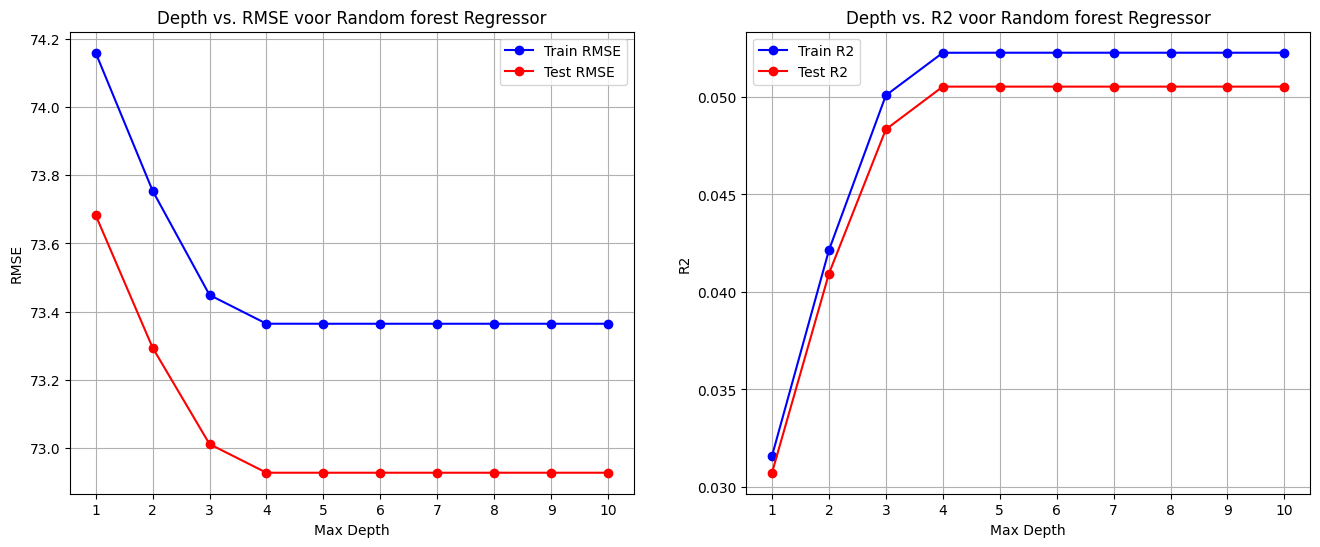

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot RMSE
ax1.plot(depths, train_rmse, marker='o', linestyle='-', color='b', label='Train RMSE')
ax1.plot(depths, test_rmse, marker='o', linestyle='-', color='r', label='Test RMSE')
ax1.set_title('Depth vs. RMSE voor Random forest Regressor')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('RMSE')
ax1.set_xticks(depths)
ax1.grid(True)
ax1.legend()

# Plot R2 score
ax2.plot(depths, train_r2, marker='o', linestyle='-', color='b', label='Train R2')
ax2.plot(depths, test_r2, marker='o', linestyle='-', color='r', label='Test R2')
ax2.set_title('Depth vs. R2 voor Random forest Regressor')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('R2')
ax2.set_xticks(depths)
ax2.grid(True)
ax2.legend()

plt.show()

Een max_depth van 10 blijkt optimaal, gebruik deze om het model te trainen.

In [5]:
max_depth = 4
regressor = RandomForestRegressor(max_depth=max_depth, min_samples_leaf=0.02, n_jobs=-1)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

y_pred = regressor.predict(X_test)

print("Root Mean Squared Error: ", rmse)
print("R-squared (R2) Score: ", r2)

baseline_rmse, baseline_r2 = calculate_baseline(model_df)
print('Baseline RMSE: ', baseline_rmse)
print('Baseline R2: ', baseline_r2)


Root Mean Squared Error:  72.74890735703106
R-squared (R2) Score:  0.05515095262489089
Baseline RMSE:  75.25674049973072
Baseline R2:  0.0


## Conclusie

Het model is met een minimaal verschil beter dan de baseline (de RMSE is een heel klein beetje lager en de R2 score is een heel klein beetje hoger).